### Black Friday Sale dataset

Dataset details: https://www.kaggle.com/datasets/sdolezel/black-friday 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# get the data
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [3]:
df_train.columns.difference(df_test.columns)

Index(['Purchase'], dtype='object')

In [4]:
# Merge the datasets to perform same pre-processing
df = df_train.append(df_test)
df.tail()
# this means there will be NaNs for Purchase in df now

C:\Users\Padmakar\AppData\Local\Temp\ipykernel_14288\1463681893.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_train.append(df_test)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN
233598,1006039,P00316642,F,46-50,0,B,4+,1,4,5.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
df.drop(['User_ID','Product_ID'], axis=1, inplace=True)

In [8]:
# modify Gender to numerical values
df['Gender'] = df['Gender'].map({'F':0, 'M':1})
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [9]:
# modify Age to numerical values

df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [10]:
# encoding manually as ML algo will be able to figure out importance eventually
# instead of using OHE
df['Age'] = df['Age'].map({'0-17':1, '18-25':2,'26-35':3,'36-45':4,'46-50':5,
                          '51-55':6,'55+':7})
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [11]:
# modifying the City_Category
# this time will use OHE
df_city = pd.get_dummies(df['City_Category'], drop_first=True)

In [12]:
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [13]:
# combine the two dataset
df = pd.concat([df,df_city], axis=1)
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [14]:
df.drop(['City_Category'], axis=1, inplace=True)

In [15]:
# Handle the + in Stay_In_Current_City_Years

In [16]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [17]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')

C:\Users\Padmakar\AppData\Local\Temp\ipykernel_14288\66897005.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')


In [18]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [19]:
## But the str are to be made into integers

In [20]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  int32  
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          537685 non-null  float64
 7   Product_Category_3          237858 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  uint8  
 10  C                           783667 non-null  uint8  
dtypes: float64(3), int32(1), int64(5), uint8(2)
memory usage: 58.3 MB


In [22]:
# Convert B and C to int as well
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  int32  
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          537685 non-null  float64
 7   Product_Category_3          237858 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  int32  
 10  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5)
memory usage: 62.8 MB


In [24]:
# Missing values
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [25]:
# Fix the missing values for Product_Category_2 and Product_Category_3
# and not for Purchase as it is Test data

In [26]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [27]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [28]:
# replace missing value with mode as they are discrete values
df['Product_Category_2'].mode()

0    8.0
Name: Product_Category_2, dtype: float64

In [29]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [30]:
df['Product_Category_2'].isnull().sum()

0

In [31]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [32]:
df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [33]:
# replace missing value with mode as they are discrete values
df['Product_Category_3'].mode()

0    16.0
Name: Product_Category_3, dtype: float64

In [34]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [35]:
df['Product_Category_3'].isnull().sum()

0

In [36]:
df['Product_Category_3'].value_counts()

16.0    592278
15.0     39968
14.0     26283
17.0     23818
5.0      23799
8.0      17861
9.0      16532
12.0     13115
13.0      7849
6.0       6888
18.0      6621
4.0       2691
11.0      2585
10.0      2501
3.0        878
Name: Product_Category_3, dtype: int64

C:\Users\Padmakar\anaconda3\envs\CustomerSegmentation\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

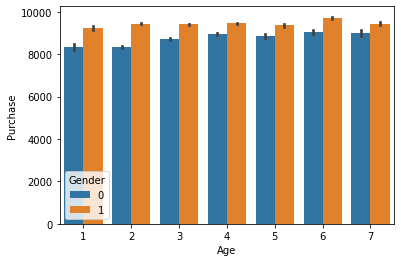

In [37]:
sns.barplot('Age','Purchase',hue='Gender',data=df)

Observation:

Male has purchased more than Female

C:\Users\Padmakar\anaconda3\envs\CustomerSegmentation\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

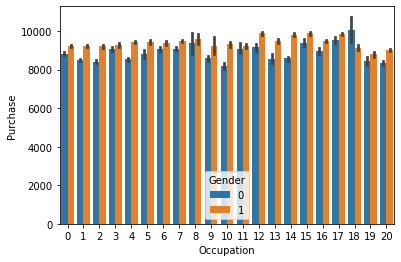

In [38]:
sns.barplot('Occupation','Purchase',hue='Gender',data=df)

C:\Users\Padmakar\anaconda3\envs\CustomerSegmentation\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

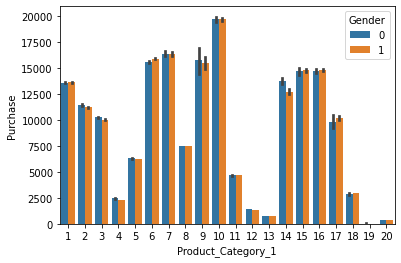

In [39]:
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df)

C:\Users\Padmakar\anaconda3\envs\CustomerSegmentation\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

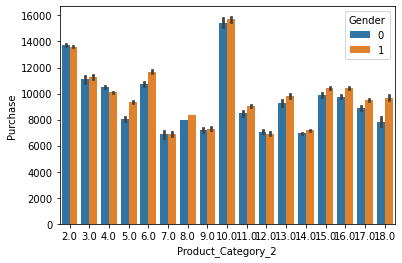

In [40]:
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df)

C:\Users\Padmakar\anaconda3\envs\CustomerSegmentation\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

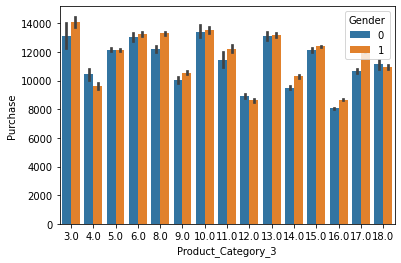

In [41]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df)

In [42]:
# Split back into train and test
df_test = df[df['Purchase'].isnull()]
df_test.drop(['Purchase'], axis=1, inplace=True)
df_train = df[~df['Purchase'].isnull()]

C:\Users\Padmakar\AppData\Local\Temp\ipykernel_14288\3351032445.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(['Purchase'], axis=1, inplace=True)


In [43]:
df_train.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [44]:
df_test.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,1,5,7,2,1,1,11.0,16.0,1,0
1,1,3,17,0,0,3,5.0,16.0,0,1
2,0,4,1,4,1,5,14.0,16.0,1,0
3,0,4,1,4,1,4,9.0,16.0,1,0
4,0,3,1,1,0,4,5.0,12.0,0,1


In [46]:
X = df_train.drop(['Purchase'], axis=1)
y = df_train['Purchase']

In [47]:
# since test.csv does not have the Purchase values to test, we divide train data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=77)


In [45]:
# Feature Scaling

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)